In [2]:
# only for test
from IPython import get_ipython
get_ipython().magic('reset -sf')  # clear cashes

import csv
import glob, os
import pandas as pd


print('aa')
print(os.path.abspath('.'))




aa
C:\Users\mynam\Documents\GitHub\Video-Player-Controlled-by-Action-Recognition_wkr\src


In [3]:
# initialisation
# TODO: move all packages here but not for now

featureDict = {'down': {} , 'up': {}, 'left': {}, 'right': {}, 'fist': {}}


In [5]:
# load data from csv files
# feature extraction
# TODO: freq-domain features 
# TODO: feature selection
# TODO: normalisation

import math
import numpy as np
import csv
import glob, os
import pandas as pd
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# locate folers
actionList = ['down', 'up', 'left', 'right', 'fist']
for currentAction in range(len(actionList)):
    filePath1 = os.path.abspath('./Dataset/hyqData/' + actionList[currentAction])
    filePath2 = os.path.abspath('./Dataset/zjhData/' + actionList[currentAction])
    filePath3 = os.path.abspath('./Dataset/sgfData/' + actionList[currentAction])
#     filePath4 = os.path.abspath('./Dataset/znData/' + actionList[currentAction])

    print('Loading action: ' + actionList[currentAction])


    file1 = glob.glob(os.path.join(filePath1, "*.csv"))
#     file2 = glob.glob(os.path.join(filePath2, "*.csv"))
#     file3 = glob.glob(os.path.join(filePath3, "*.csv"))
#     file4 = glob.glob(os.path.join(filePath4, "*.csv"))


    dl = []
    for f in file1:
        dl.append(pd.read_csv(f, header=None))
#     for f in file2:
#         dl.append(pd.read_csv(f, header=None))
#     for f in file3:
#         dl.append(pd.read_csv(f, header=None))
#     for f in file4:
#         dl.append(pd.read_csv(f, header=None))



    # obtain each EMG channel data
    

    featureList = []
    
    fs = 100 # sample frequency
    T = 1/fs # sample rate

    csvFileIndex=0
    currentCSV=0
    for csvFileIndex in range(len(dl)): # access every csv file
        emg_1=[]
        emg_2=[]
        emg_3=[]
        for currentCSV in range(len(dl[csvFileIndex].values.tolist())): # access every recorded sample
            emg_1.append(dl[csvFileIndex].values.tolist()[currentCSV][0])
            emg_2.append(dl[csvFileIndex].values.tolist()[currentCSV][1])
            emg_3.append(dl[csvFileIndex].values.tolist()[currentCSV][2])


        ### calculate time-domain features for every csv file

        # Mean Absolute Value
        mav_emg_1 = 0
        mav_emg_2 = 0
        mav_emg_3 = 0
        # Wavelength
        wl_emg_1 = 0
        wl_emg_2 = 0
        wl_emg_3 = 0
        # Slope Sign Changes
        sscThreshold = 0 # TODO: detemine the threshold
        ssc_emg_1 = 0
        ssc_emg_2 = 0
        ssc_emg_3 = 0
        # Zero Crossing: we don't have, do we?
        zc_emg_1 = 0
        zc_emg_2 = 0
        zc_emg_3 = 0
        # Root Mean Square
        rms_emg_1 = 0.0
        rms_emg_2 = 0.0
        rms_emg_3 = 0.0
        # frequency-domain features
        # Mean Frequency
        meanFreq_emg_1 = 0.0
        meanFreq_emg_2 = 0.0
        meanFreq_emg_3 = 0.0
        # Median Frequency
        medianFreq_emg_1 = 0.0
        medianFreq_emg_2 = 0.0
        medianFreq_emg_3 = 0.0
        # Mean Power
        meanPower_emg_1 = 0.0
        meanPower_emg_2 = 0.0
        meanPower_emg_3 = 0.0
        # Variance of Central Frequency
        vcf_emg_1 = 0.0
        vcf_emg_2 = 0.0
        vcf_emg_3 = 0.0
        
        # some temporary variables
        
        abs_sum_temp1=0
        abs_sum_temp2=0
        abs_sum_temp3=0
        ssc_temp1=0
        ssc_temp2=0
        ssc_temp3=0
        rms_temp1=0.0
        rms_temp2=0.0
        rms_temp3=0.0
        
        freqs_temp1, psd_temp1 = signal.welch(emg_1, fs)
        freqs_temp2, psd_temp2 = signal.welch(emg_2, fs)
        freqs_temp3, psd_temp3 = signal.welch(emg_3, fs)
        nominatorValue_temp1=0
        nominatorValue_temp2=0
        nominatorValue_temp3=0
        denominatorValue_temp1=0
        denominatorValue_temp2=0
        denominatorValue_temp3=0
        sm2_temp1=0
        sm2_temp2=0
        sm2_temp3=0
        
        i=0
        for i in range(len(emg_3)):
            abs_sum_temp1 = abs_sum_temp1 + abs(int(emg_1[i]))
            abs_sum_temp2 = abs_sum_temp2 + abs(int(emg_2[i]))
            abs_sum_temp3 = abs_sum_temp3 + abs(int(emg_3[i]))
            
            rms_temp1 = rms_temp1 + (int(emg_1[i]))**2
            rms_temp2 = rms_temp2 + (int(emg_2[i]))**2
            rms_temp3 = rms_temp3 + (int(emg_3[i]))**2
            
            if(i>0):
                wl_emg_1 = wl_emg_1 + abs(int(emg_1[i]) - int(emg_1[i-1]))
                wl_emg_2 = wl_emg_2 + abs(int(emg_2[i]) - int(emg_2[i-1]))
                wl_emg_3 = wl_emg_3 + abs(int(emg_3[i]) - int(emg_3[i-1]))
            if(i>1):
                ssc_temp1 = (int(emg_1[i-1]) - int(emg_1[i-2])) * (int(emg_1[i-1]) - int(emg_1[i]))
                ssc_temp2 = (int(emg_2[i-1]) - int(emg_2[i-2])) * (int(emg_2[i-1]) - int(emg_2[i]))
                ssc_temp3 = (int(emg_3[i-1]) - int(emg_3[i-2])) * (int(emg_3[i-1]) - int(emg_3[i]))
                if ssc_temp1 >= sscThreshold:
                    ssc_emg_1 = ssc_emg_1 + 1
                if ssc_temp2 >= sscThreshold:
                    ssc_emg_2 = ssc_emg_2 + 1
                if ssc_temp3 >= sscThreshold:
                    ssc_emg_3 = ssc_emg_3 + 1
            
            mav_emg_1 = abs_sum_temp1/len(emg_1)
            mav_emg_2 = abs_sum_temp2/len(emg_2)
            mav_emg_3 = abs_sum_temp3/len(emg_3)

            rms_emg_1 = math.sqrt(rms_temp1/len(emg_1))
            rms_emg_2 = math.sqrt(rms_temp2/len(emg_2))
            rms_emg_3 = math.sqrt(rms_temp3/len(emg_3))
            
        j=0
        for j in range(len(freqs_temp1)):
            nominatorValue_temp1 += freqs_temp1[j]*psd_temp1[j]
            nominatorValue_temp2 += freqs_temp2[j]*psd_temp2[j]
            nominatorValue_temp3 += freqs_temp3[j]*psd_temp3[j]
            denominatorValue_temp1 += psd_temp1[j]
            denominatorValue_temp2 += psd_temp2[j]
            denominatorValue_temp3 += psd_temp3[j]
            sm2_temp1 += np.square(freqs_temp1[j])*psd_temp1[j]
            sm2_temp2 += np.square(freqs_temp2[j])*psd_temp2[j]
            sm2_temp3 += np.square(freqs_temp3[j])*psd_temp3[j]
            
        meanFreq_emg_1 = nominatorValue_temp1/denominatorValue_temp1
        meanFreq_emg_2 = nominatorValue_temp2/denominatorValue_temp2
        meanFreq_emg_3 = nominatorValue_temp3/denominatorValue_temp3

        medianFreq_emg_1 = freqs_temp1[np.argsort(psd_temp1)[len(psd_temp1)//2]]
        medianFreq_emg_2 = freqs_temp2[np.argsort(psd_temp2)[len(psd_temp2)//2]]
        medianFreq_emg_3 = freqs_temp3[np.argsort(psd_temp3)[len(psd_temp3)//2]]
        
        meanPower_emg_1 = denominatorValue_temp1/len(freqs_temp1)
        meanPower_emg_2 = denominatorValue_temp2/len(freqs_temp2)
        meanPower_emg_3 = denominatorValue_temp3/len(freqs_temp3)
        
        vcf_emg_1 = sm2_temp1/denominatorValue_temp1 - np.square(nominatorValue_temp1/denominatorValue_temp1)
        vcf_emg_2 = sm2_temp2/denominatorValue_temp2 - np.square(nominatorValue_temp2/denominatorValue_temp2)
        vcf_emg_3 = sm2_temp3/denominatorValue_temp3 - np.square(nominatorValue_temp3/denominatorValue_temp3)
            
        featureDict[actionList[currentAction]][csvFileIndex] = [mav_emg_1, mav_emg_2, mav_emg_3, 
                                                                wl_emg_1, wl_emg_2, wl_emg_3, 
                                                                ssc_emg_1, ssc_emg_2, ssc_emg_3, 
                                                                rms_emg_1, rms_emg_2, rms_emg_3, 
                                                                meanFreq_emg_1, meanFreq_emg_2, meanFreq_emg_3,
                                                                medianFreq_emg_1, medianFreq_emg_2, medianFreq_emg_3,
                                                                meanPower_emg_1, meanPower_emg_2, meanPower_emg_3,
                                                                vcf_emg_1, vcf_emg_2, vcf_emg_3]
        
#         TODO: visualisation
#         print(ssc_emg_1, ssc_emg_2, ssc_emg_3)
#         print(mav_emg_1, mav_emg_2, mav_emg_3)
#         print(wl_emg_1, wl_emg_2, wl_emg_3)
#         print(rms_emg_1, rms_emg_2, rms_emg_3)
#         print(round(meanFreq_emg_1,2), round(medianFreq_emg_1,2), round(meanPower_emg_1,2), round(vcf_emg_1,2))
#         print('processing the next file')

# normalisation
    #featureDict




print('Loading completed')



Loading action: down
Loading action: up
Loading action: left
Loading action: right
Loading action: fist
Loading completed


In [19]:
# print(featureDict['down'][0])
import statistics

currentAction='down'
csvFileIndex=0

for featureIndex in range(len(featureDict[currentAction][0])):
#     tempSum=0
    tempFeatureList=[]
    stdValue=0.0
    meanValue=0.0
    for csvFileIndex in range(len(featureDict[currentAction])):
#         tempSum += featureDict[currentAction][csvFileIndex][featureIndex]
        tempFeatureList.append(featureDict[currentAction][csvFileIndex][featureIndex])
        
    meanValue = statistics.mean(tempFeatureList)
    stdValue = statistics.stdev(tempFeatureList)
    for csvFileIndex in range(len(featureDict[currentAction])):
        featureDict[currentAction][csvFileIndex][featureIndex] = (featureDict[currentAction][csvFileIndex][featureIndex]-meanValue)/stdValue
        




0.6517345443702095
0.47923343458476425
-1.6960441383326488
1.036968652165819
1.1245970114497992
0.5249765403745155
-1.5549569686678757
0.006370967505174706
-0.867708138308612
0.2968121331822655
2.187159757987618
-0.5673467810144671
0.13753794555289361
1.5158934585669421
-0.25926971912928054
-1.1741318349242906
0.7586521651317953
0.6318941611361001
-1.954520242132564
-0.08401300056132033
-0.9454163059755374
-0.09227982690886513
-0.10660899257794348
0.043296125190877416
-0.09283094866536881
down
-0.1666202492447739
0.23524677119716778
-0.9478722190549832
0.49941110631284913
-1.1579390706496338
-0.4659128204130736
0.07154919119197034
0.9757499871863391
-0.032430387523776597
-0.008543187007996108
1.5096991751861228
0.6111188969601723
2.3864999470594515
-0.8495131581076544
0.95467304555477
-1.7923550137599031
0.909006338686367
1.1022116369757615
-0.9436568307286685
0.5429701190180953
-0.8467028992234445
-0.6099385882288052
-1.5253804197600118
-0.6225847532077464
0.17131338158140405
down
2.4

In [101]:
print([round(test,1) for test in featureDict['down'][0]])
print([round(test,1) for test in featureDict['up'][1]])
print([round(test,1) for test in featureDict['left'][2]])
print([round(test,1) for test in featureDict['right'][2]])
print([round(test,1) for test in featureDict['fist'][2]])

[39.7, 55.2, 74.9, 499, 522, 1652, 219, 196, 215, 46.8, 64.4, 170.2, 0.9, 1.2, 0.9, 16.4, 18.0, 41.8, 11.5, 7.0, 199.1, 8.6, 6.5, 1.1]
[21.5, 187.4, 76.3, 163, 1275, 834, 260, 142, 203, 22.2, 230.3, 121.4, 2.3, 0.7, 0.6, 9.4, 14.8, 36.7, 0.5, 374.4, 183.6, 18.5, 0.4, 0.6]
[64.5, 62.7, 14.6, 1209, 765, 178, 210, 186, 253, 117.3, 95.5, 22.1, 0.7, 0.5, 0.9, 36.3, 43.8, 18.0, 34.2, 32.7, 2.0, 1.3, 0.6, 1.1]
[30.0, 72.6, 40.1, 432, 714, 1069, 220, 185, 238, 34.7, 83.7, 102.3, 2.0, 1.0, 1.3, 24.6, 49.2, 17.6, 8.0, 19.9, 181.2, 12.9, 3.1, 1.5]
[36.0, 92.0, 17.7, 1185, 1468, 498, 454, 338, 460, 75.0, 126.8, 33.1, 0.4, 0.6, 0.4, 26.2, 37.9, 16.4, 15.2, 24.2, 3.2, 0.7, 2.6, 1.3]


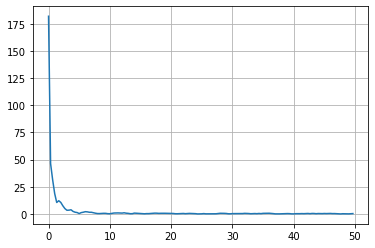

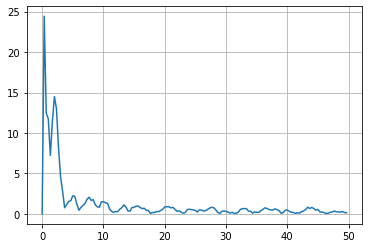

0.8781626790867191
28.90625
21.91596608539089
2.512096817876756


In [40]:
# frequency-domain features
from scipy import signal
from scipy.fft import fft, ifft, fftfreq
import matplotlib.pyplot as plt

# os.path.abspath('./Dataset/hyqData')
# dl = []
# for f in file1:
#     dl.append(pd.read_csv(f, header=None))
    
# emg_1=[]
# emg_2=[]
# emg_3=[]

# for row in range(len(dl[0])):
#     emg_1.append(dl[0].values.tolist()[row][0])
#     emg_2.append(dl[0].values.tolist()[row][1])
#     emg_3.append(dl[0].values.tolist()[row][2])

# mean frequency
meanFreq = 0
# variance of central frequency
VCF=0
# median frequency
medianFreq = 0
# mean power
meanPower = 0



T=1/100 # sample rate
N=len(emg_2)
freqDict={}
yf=fft(emg_2)
xf = fftfreq(N, T)[:N//2] #0.3344 per sample

plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
plt.grid()
plt.show()

detrendSig = signal.detrend(emg_2)
yf=fft(detrendSig)
xf = fftfreq(N, T)[:N//2] #0.3344 per sample
plt.plot(xf[:], 2.0/N * np.abs(yf[0:N//2][:]))
plt.grid()
plt.show()

freqs, psd = signal.welch(signal.detrend(emg_3), 100)
nominatorValue=0
denominatorValue=0
SM2=0
for i in range(len(freqs)):
    nominatorValue += freqs[i]*psd[i]
    denominatorValue += psd[i]
    SM2 += np.square(freqs[i])*psd[i] 
    
meanFreq = nominatorValue/denominatorValue

medianFreq = freqs[np.argsort(psd)[len(psd)//2]]

meanPower = denominatorValue/len(freqs)


VCF = SM2/denominatorValue - np.square(nominatorValue/denominatorValue)

print(meanFreq)
print(medianFreq)
print(meanPower)
print(VCF)


# Pxx_den = np.reshape( Pxx_den, (1,-1) ) 
# width = np.tile(f[1]-f[0], (1, Pxx_den.shape[1]))
# f = np.reshape(f, (1, -1))
# P = Pxx_den * width
# pwr = np.sum(P)
# mnfreq = np.dot(P, f.T)/pwr





In [39]:
listtemp = (2.0/N * np.abs(yf[0:N//2][:]))
print(xf[3]-xf[2]) #

print(len(freqs))


300


In [4]:
# TODO: feature selection
# TODO: visualisation (if possible)

print(featureDict.keys())
print(len(featureDict['down']))
print(len(featureDict['up']))
print(len(featureDict['left']))
print(len(featureDict['right']))
print(len(featureDict['fist']))
print(featureDict['down'][0])
print(featureDict['up'][0])
print(featureDict['left'][0])
print(featureDict['right'][0])
print(featureDict['fist'][0])


dict_keys(['down', 'up', 'left', 'right', 'fist'])
75
70
69
70
75
[39.693333333333335, 55.17666666666667, 74.89666666666666, 499, 522, 1652, 219, 196, 215, 46.753894668430206, 64.37931862536809, 170.15286264611203]
[17.243333333333332, 171.14, 105.74333333333334, 40, 1030, 610, 297, 147, 157, 17.271460081108756, 216.06070134725258, 131.5700700514115]
[52.26, 71.05666666666667, 18.476666666666667, 964, 774, 168, 227, 198, 255, 85.64395289024594, 101.17929630117023, 27.522899556551085]
[59.38, 72.19, 59.7, 966, 705, 1261, 195, 174, 232, 76.48424674401913, 85.48288327690716, 137.3561550616984]
[58.67666666666667, 118.07333333333334, 32.553333333333335, 1285, 1341, 802, 226, 168, 234, 103.38170373265604, 130.02540777350657, 53.41891050929436]


(78, 24)
(78, 6)
(26, 24)
(26, 6)
(26, 24)
(26, 6)
Epoch 1/100
2/2 [==============================] - 0s 197ms/step - loss: 1.8175 - accuracy: 0.1795 - val_loss: 1.7819 - val_accuracy: 0.1923
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7995 - accuracy: 0.1795 - val_loss: 1.7715 - val_accuracy: 0.1923
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7824 - accuracy: 0.1795 - val_loss: 1.7611 - val_accuracy: 0.1923
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7676 - accuracy: 0.1795 - val_loss: 1.7512 - val_accuracy: 0.2308
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7528 - accuracy: 0.1795 - val_loss: 1.7412 - val_accuracy: 0.2308
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7387 - accuracy: 0.1667 - val_loss: 1.7311 - val_accuracy: 0.2308
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 1.7248 - accuracy: 0.1667 - val_loss

Epoch 59/100
2/2 [==============================] - 0s 10ms/step - loss: 0.4380 - accuracy: 0.9231 - val_loss: 0.6298 - val_accuracy: 0.7692
Epoch 60/100
2/2 [==============================] - 0s 10ms/step - loss: 0.4231 - accuracy: 0.9231 - val_loss: 0.6143 - val_accuracy: 0.8077
Epoch 61/100
2/2 [==============================] - 0s 10ms/step - loss: 0.4064 - accuracy: 0.9359 - val_loss: 0.6001 - val_accuracy: 0.8077
Epoch 62/100
2/2 [==============================] - 0s 10ms/step - loss: 0.3912 - accuracy: 0.9231 - val_loss: 0.5874 - val_accuracy: 0.8077
Epoch 63/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3766 - accuracy: 0.9231 - val_loss: 0.5768 - val_accuracy: 0.7692
Epoch 64/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3620 - accuracy: 0.9231 - val_loss: 0.5664 - val_accuracy: 0.7692
Epoch 65/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3489 - accuracy: 0.9231 - val_loss: 0.5560 - val_accuracy: 0.7692
Epoch 66/100


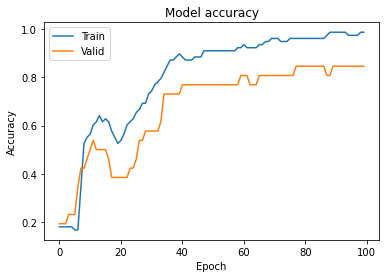

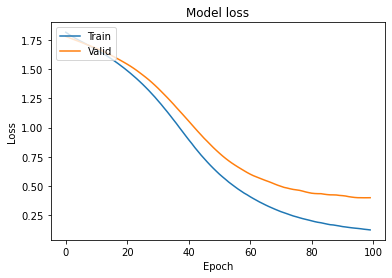

Test loss: 0.17928838729858398
Test accuracy: 0.9615384340286255


In [33]:
# create labels for data samples

from keras.utils import np_utils,normalize
x_val=[]
y_val=[]

def labelSwitch(arg):
    switcher = {
        'left': 1,
        'right': 2,
        'up': 3,
        'down': 4,
        'fist': 5
    }
    return switcher[arg]

i=0
j=''
dictLength=0
current = ['down', 'up', 'left', 'right', 'fist']
for j in range(len(current)):
    for i in range(len(featureDict[current[j]])):
        x_val.append(featureDict[current[j]][i])
        y_val.append(labelSwitch(current[j]))
        dictLength=dictLength+1

x_val_array = np.array(x_val)
y_val_array = np.array(y_val).reshape(dictLength,1)

x_val_array = normalize(x_val_array, axis = 1)

state = np.random.get_state()
np.random.shuffle(x_val_array)
np.random.set_state(state)
np.random.shuffle(y_val_array)


TRAIN_SPLIT = int(0.6*x_val_array.shape[0])
TEST_SPLIT = int(0.2*x_val_array.shape[0] + TRAIN_SPLIT)


x_train, x_test, x_validate = np.split(x_val_array, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_test, y_validate = np.split(y_val_array, [TRAIN_SPLIT, TEST_SPLIT])



y_train_class = np_utils.to_categorical(y_train)
y_test_class = np_utils.to_categorical(y_test)
y_validate_class = np_utils.to_categorical(y_validate)


#  see dataset volume

print(x_train.shape)
print(y_train_class.shape)
print(x_validate.shape)
print(y_validate_class.shape)
print(x_test.shape)
print(y_test_class.shape)




# TODO: Model

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.optimizers import RMSprop
tf.random.set_seed(1234)

model = Sequential()

model.add(Dense(12, activation='relu', input_shape=(x_train.shape)))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(50, activation='relu'))
# model.add(Dropout(0.1))
model.add(Dense(6, activation='softmax'))

# opt = RMSprop(lr=0.1, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(x_train, y_train_class, epochs=100, batch_size=50, validation_data=(x_validate, y_validate_class))

# Plot training accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

# Plot training loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'], loc='upper left')
plt.show()

score = model.evaluate(x_test, y_test_class, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [29]:
print(x_val_array)

[[ 0.18027345  0.08682091  0.00612823 ... -0.21879772  0.08699026
   0.21560933]
 [ 0.01910069  0.05002453  0.02607367 ...  0.00733201  0.00377001
   0.00412331]
 [ 0.03101467  0.04163963  0.02961288 ...  0.00311118  0.00190936
   0.00126384]
 ...
 [ 0.02134381  0.04251818  0.03340949 ...  0.00461712  0.00362215
   0.00138281]
 [ 0.01720397  0.04397324  0.00846765 ...  0.00035426  0.00125055
   0.00061595]
 [-0.31584766  0.01453329 -0.16461013 ...  0.23929876 -0.2555866
  -0.04848634]]
